In [1]:
### Setup data,model,ntk method

import torch
from torchvision.transforms import ToTensor
from torchvision import datasets
from tqdm import tqdm
import definitions as df
from importlib import reload
import definitions as df
import torch
from tqdm import tqdm
import importlib
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import solvers
import models as model
importlib.reload(model)
importlib.reload(solvers)

torch.set_default_dtype(torch.float64)

reload(df)

N_TRAIN = 1000
N_TEST = 100
N_OUTPUT = 10

training_data = datasets.MNIST(
    root="data/MNIST",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data/MNIST",
    train=False,
    download=True,
    transform=ToTensor()
)

training_data = torch.utils.data.Subset(training_data,range(N_TRAIN))
test_data = torch.utils.data.Subset(test_data,range(N_TEST))


class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 28, 28)

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = torch.nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10),
        )

    def forward(self,x):
        return self.net(x)
    
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
    
ntk_net = LeNet5()
ntk_net.apply(init_weights)
ntk_net.eval()

print("Number of parameters p = {}".format(sum(p.numel() for p in ntk_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)
test_x,test_y = next(iter(test_dataloader))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ntk_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_train_ce = df.train_loop(train_dataloader, ntk_net, loss_fn, optimizer)
    cnn_test_ce, cnn_test_acc = df.test_loop(test_dataloader, ntk_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_train_ce))
        print("Test CE = {:.2f}".format(cnn_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_test_acc))
        print("\n -------------------------------------")
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_test_acc))


Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:36,  2.73it/s]

Epoch 0 of 100
Training CE = 2.353
Test CE = 2.31
Test accuracy = 15.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:32,  2.93it/s]

Epoch 4 of 100
Training CE = 2.224
Test CE = 2.11
Test accuracy = 41.0%

 -------------------------------------


  9%|▉         | 9/100 [00:03<00:30,  2.95it/s]

Epoch 8 of 100
Training CE = 0.912
Test CE = 0.83
Test accuracy = 77.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:04<00:27,  3.11it/s]

Epoch 12 of 100
Training CE = 0.440
Test CE = 0.48
Test accuracy = 83.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:05<00:27,  2.96it/s]

Epoch 16 of 100
Training CE = 0.248
Test CE = 0.39
Test accuracy = 87.0%

 -------------------------------------


 21%|██        | 21/100 [00:07<00:27,  2.92it/s]

Epoch 20 of 100
Training CE = 0.168
Test CE = 0.39
Test accuracy = 86.0%

 -------------------------------------


 25%|██▌       | 25/100 [00:08<00:24,  3.03it/s]

Epoch 24 of 100
Training CE = 0.163
Test CE = 0.37
Test accuracy = 87.0%

 -------------------------------------


 29%|██▉       | 29/100 [00:09<00:22,  3.17it/s]

Epoch 28 of 100
Training CE = 0.097
Test CE = 0.33
Test accuracy = 89.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:10<00:21,  3.11it/s]

Epoch 32 of 100
Training CE = 0.050
Test CE = 0.19
Test accuracy = 92.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:12<00:20,  3.08it/s]

Epoch 36 of 100
Training CE = 0.034
Test CE = 0.16
Test accuracy = 94.0%

 -------------------------------------


 41%|████      | 41/100 [00:13<00:18,  3.11it/s]

Epoch 40 of 100
Training CE = 0.031
Test CE = 0.19
Test accuracy = 95.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:14<00:17,  3.12it/s]

Epoch 44 of 100
Training CE = 0.027
Test CE = 0.16
Test accuracy = 94.0%

 -------------------------------------


 49%|████▉     | 49/100 [00:16<00:16,  3.07it/s]

Epoch 48 of 100
Training CE = 0.013
Test CE = 0.16
Test accuracy = 95.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:17<00:14,  3.14it/s]

Epoch 52 of 100
Training CE = 0.008
Test CE = 0.17
Test accuracy = 96.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:18<00:13,  3.14it/s]

Epoch 56 of 100
Training CE = 0.006
Test CE = 0.17
Test accuracy = 96.0%

 -------------------------------------


 61%|██████    | 61/100 [00:19<00:12,  3.07it/s]

Epoch 60 of 100
Training CE = 0.005
Test CE = 0.17
Test accuracy = 96.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:21<00:11,  3.08it/s]

Epoch 64 of 100
Training CE = 0.005
Test CE = 0.17
Test accuracy = 96.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:22<00:10,  3.05it/s]

Epoch 68 of 100
Training CE = 0.004
Test CE = 0.17
Test accuracy = 96.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:23<00:08,  3.27it/s]

Epoch 72 of 100
Training CE = 0.004
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 77%|███████▋  | 77/100 [00:25<00:07,  3.15it/s]

Epoch 76 of 100
Training CE = 0.003
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 81%|████████  | 81/100 [00:26<00:06,  3.07it/s]

Epoch 80 of 100
Training CE = 0.003
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:27<00:04,  3.11it/s]

Epoch 84 of 100
Training CE = 0.003
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 89%|████████▉ | 89/100 [00:29<00:03,  3.08it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:30<00:02,  3.12it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


 97%|█████████▋| 97/100 [00:31<00:00,  3.07it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.17
Test accuracy = 97.0%

 -------------------------------------


100%|██████████| 100/100 [00:32<00:00,  3.07it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.17
Final net test accuracy = 97.0%


In [2]:
### Train NTK Network on Brier Loss

def one_hot(y,num_classes):
    yh = torch.zeros((y.shape[0],num_classes),dtype=torch.float64)
    yh[torch.arange(y.shape[0]),y] = 1
    return yh

mse = nn.MSELoss()

def brier_loss(pred,target):
    pred = pred.softmax(dim=1)
    target = one_hot(target,N_OUTPUT)
    return mse(pred,target)

ntk_softmax_net = LeNet5()
ntk_softmax_net.apply(init_weights)
ntk_softmax_net.eval()
learning_rate = 5e-3

mse = nn.MSELoss()
optimizer = torch.optim.Adam(ntk_softmax_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_train_brier = df.train_loop(train_dataloader, ntk_softmax_net, brier_loss, optimizer)
    cnn_test_brier, cnn_test_acc = df.test_loop(test_dataloader, ntk_softmax_net, brier_loss)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training Brier = {:.3f}".format(cnn_train_brier))
        print("Test Brier = {:.2f}".format(cnn_test_brier))
        print("Test accuracy = {:.1f}%".format(100*cnn_test_acc))
        print("\n -------------------------------------")
print("Done!")
print("Final net training Brier = {:.3f}".format(cnn_train_brier))
print("Final net test Brier = {:.2f}".format(cnn_test_brier))
print("Final net test accuracy = {:.1f}%".format(100*cnn_test_acc))

  1%|          | 1/100 [00:00<00:30,  3.19it/s]

Epoch 0 of 100
Training Brier = 0.092
Test Brier = 0.09
Test accuracy = 14.0%

 -------------------------------------


  5%|▌         | 5/100 [00:01<00:27,  3.48it/s]

Epoch 4 of 100
Training Brier = 0.091
Test Brier = 0.09
Test accuracy = 15.0%

 -------------------------------------


  9%|▉         | 9/100 [00:02<00:26,  3.41it/s]

Epoch 8 of 100
Training Brier = 0.050
Test Brier = 0.05
Test accuracy = 62.0%

 -------------------------------------


 13%|█▎        | 13/100 [00:03<00:28,  3.09it/s]

Epoch 12 of 100
Training Brier = 0.023
Test Brier = 0.03
Test accuracy = 81.0%

 -------------------------------------


 17%|█▋        | 17/100 [00:05<00:27,  3.06it/s]

Epoch 16 of 100
Training Brier = 0.013
Test Brier = 0.02
Test accuracy = 87.0%

 -------------------------------------


 21%|██        | 21/100 [00:06<00:24,  3.18it/s]

Epoch 20 of 100
Training Brier = 0.008
Test Brier = 0.02
Test accuracy = 89.0%

 -------------------------------------


 25%|██▌       | 25/100 [00:07<00:24,  3.05it/s]

Epoch 24 of 100
Training Brier = 0.007
Test Brier = 0.02
Test accuracy = 88.0%

 -------------------------------------


 29%|██▉       | 29/100 [00:09<00:22,  3.10it/s]

Epoch 28 of 100
Training Brier = 0.006
Test Brier = 0.01
Test accuracy = 92.0%

 -------------------------------------


 33%|███▎      | 33/100 [00:10<00:21,  3.13it/s]

Epoch 32 of 100
Training Brier = 0.008
Test Brier = 0.01
Test accuracy = 93.0%

 -------------------------------------


 37%|███▋      | 37/100 [00:11<00:21,  2.99it/s]

Epoch 36 of 100
Training Brier = 0.005
Test Brier = 0.01
Test accuracy = 95.0%

 -------------------------------------


 41%|████      | 41/100 [00:13<00:19,  3.10it/s]

Epoch 40 of 100
Training Brier = 0.004
Test Brier = 0.01
Test accuracy = 95.0%

 -------------------------------------


 45%|████▌     | 45/100 [00:14<00:17,  3.13it/s]

Epoch 44 of 100
Training Brier = 0.004
Test Brier = 0.01
Test accuracy = 92.0%

 -------------------------------------


 49%|████▉     | 49/100 [00:15<00:16,  3.19it/s]

Epoch 48 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 94.0%

 -------------------------------------


 53%|█████▎    | 53/100 [00:16<00:13,  3.44it/s]

Epoch 52 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 96.0%

 -------------------------------------


 57%|█████▋    | 57/100 [00:17<00:13,  3.28it/s]

Epoch 56 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 95.0%

 -------------------------------------


 61%|██████    | 61/100 [00:19<00:12,  3.17it/s]

Epoch 60 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 95.0%

 -------------------------------------


 65%|██████▌   | 65/100 [00:20<00:10,  3.27it/s]

Epoch 64 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 94.0%

 -------------------------------------


 69%|██████▉   | 69/100 [00:21<00:10,  3.01it/s]

Epoch 68 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 96.0%

 -------------------------------------


 73%|███████▎  | 73/100 [00:22<00:08,  3.21it/s]

Epoch 72 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 97.0%

 -------------------------------------


 77%|███████▋  | 77/100 [00:24<00:07,  3.12it/s]

Epoch 76 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 94.0%

 -------------------------------------


 81%|████████  | 81/100 [00:25<00:06,  3.06it/s]

Epoch 80 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 94.0%

 -------------------------------------


 85%|████████▌ | 85/100 [00:26<00:04,  3.27it/s]

Epoch 84 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 92.0%

 -------------------------------------


 89%|████████▉ | 89/100 [00:28<00:03,  3.00it/s]

Epoch 88 of 100
Training Brier = 0.001
Test Brier = 0.01
Test accuracy = 96.0%

 -------------------------------------


 93%|█████████▎| 93/100 [00:29<00:02,  3.20it/s]

Epoch 92 of 100
Training Brier = 0.001
Test Brier = 0.01
Test accuracy = 94.0%

 -------------------------------------


 97%|█████████▋| 97/100 [00:30<00:00,  3.00it/s]

Epoch 96 of 100
Training Brier = 0.002
Test Brier = 0.01
Test accuracy = 95.0%

 -------------------------------------


100%|██████████| 100/100 [00:31<00:00,  3.16it/s]

Done!
Final net training Brier = 0.003
Final net test Brier = 0.01
Final net test accuracy = 92.0%


In [3]:
### Find NTK Kappa condition number and eigenvalues

from functorch import make_functional_with_buffers
reload(df)

fnet, params, buffers = make_functional_with_buffers(ntk_net)     

def fnet_single(params, x):
    # return fnet(params, buffers, x.unsqueeze(0)).squeeze(0).softmax(dim=0)[0].reshape(1) # if brier
    return fnet(params, buffers, x.unsqueeze(0)).squeeze(0)[0].reshape(1) # if n0t brier loss

dataset1_ntk = DataLoader(training_data,len(training_data))
x1_ntk,_ = next(iter(dataset1_ntk))

for x1_single in x1_ntk:
    y = fnet_single(params,x1_single)
print("fnet shape is {}".format(y.shape))
print("fnet is {}".format(y))

Kappa = df.empirical_ntk_jacobian_contraction(fnet_single, params, x1_ntk, x1_ntk)
Kappa = Kappa.detach().numpy().squeeze((2,3))

print("For training data size n = {}".format(N_TRAIN))
print("Condition number of Kappa = {}".format(np.linalg.cond(Kappa)))
eigs = np.linalg.eigvalsh(Kappa)
print("Number of negative eigvals = {}".format(eigs[eigs<0].size))

C:\Users\s4531973\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\_functorch\deprecated.py:101: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional_with_buffers is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional_with_buffers', 'torch.func.functional_call')


fnet shape is torch.Size([1])
fnet is tensor([-0.6239], grad_fn=<ReshapeAliasBackward0>)
For training data size n = 1000
Condition number of Kappa = 11783541.414235169
Number of negative eigvals = 0


C:\Users\s4531973\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\_functorch\deprecated.py:97: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional', 'torch.func.functional_call')
100%|██████████| 1000/1000 [08:17<00:00,  2.01it/s]


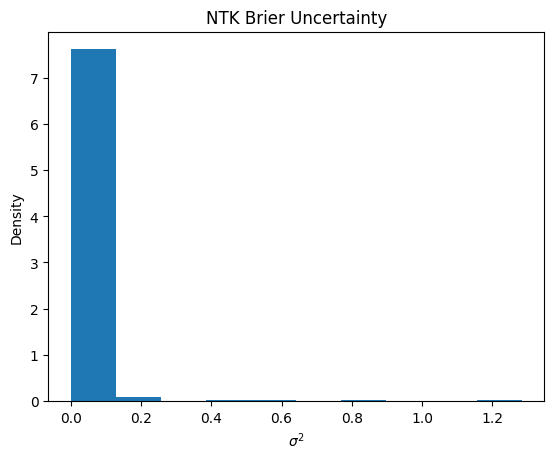

In [4]:
### Find ntk uncertainty and mu
reload(df)

rtol_solve = 1e-10
maxit_solve = 200

uncertainty_array_ntk, mu_ntk = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=test_data,
    model=ntk_softmax_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve,
    softmax=True)

plt.hist(uncertainty_array_ntk.reshape(-1,1),density=True)
plt.xlabel("$\sigma^2$")
plt.ylabel('Density')
plt.title("NTK Brier Uncertainty")
plt.show()


In [5]:
### Sample from ntk distribution to find predictive posterior
y_pred_ntk = ntk_net(test_x)

def ntk_sampler(mu,sigma_2,S):
    shape_mu = mu.shape
    post_pred = np.zeros_like(mu)
    for s in range(S):
        random_num = np.random.rand(shape_mu[0],shape_mu[1])
        post_pred += mu + np.multiply(random_num,np.sqrt(sigma_2))
    post_pred /= S
    return post_pred

y_post_pred_ntk = torch.from_numpy(ntk_sampler(mu_ntk,uncertainty_array_ntk,30).transpose())

In [6]:
### Deep Ensemble method

ensemble_M = 5

ensemble_model_list = []
ensemble_opt_list = []
ensemble_ce_training_list = np.empty(ensemble_M)
ensemble_ce_test_list = np.empty(ensemble_M)
ensemble_ce_acc_list = np.empty(ensemble_M)

for i in range(ensemble_M):
    ensemble_model_list.append(LeNet5())
    ensemble_model_list[i].apply(init_weights)
    ensemble_opt_list.append(torch.optim.Adam(ensemble_model_list[i].parameters(), lr=learning_rate, weight_decay=1e-5))

for i in range(ensemble_M):
    print(f"\n Training ensemble {i+1} ")
    for epoch in tqdm(range(epochs)):
        cnn_train_ce = df.train_loop(train_dataloader, ensemble_model_list[i], loss_fn, ensemble_opt_list[i])
        cnn_test_ce, cnn_test_acc = df.test_loop(test_dataloader, ensemble_model_list[i], loss_fn)
        if epoch % int(epochs/5) == 0:
            print("Epoch {} of {}".format(epoch,epochs))
            print("Training CE = {:.3f}".format(cnn_train_ce))
            print("Test CE = {:.2f}".format(cnn_test_ce))
            print("Test accuracy = {:.1f}%".format(100*cnn_test_acc))
    print("Done!")
    print("Final cnn training cross-entropy = {:.3f}".format(cnn_train_ce))
    print("Final cnn test cross-entropy = {:.2f}".format(cnn_test_ce))
    print("Final cnn test accuracy = {:.1f}%".format(100*cnn_test_acc))
    ensemble_ce_training_list[i] = cnn_train_ce
    ensemble_ce_test_list[i] = cnn_test_ce
    ensemble_ce_acc_list[i] = cnn_test_acc
print('\n Ensemble training process has finished.')


 Training ensemble 1 


  1%|          | 1/100 [00:00<00:27,  3.66it/s]

Epoch 0 of 100
Training CE = 2.352
Test CE = 2.30
Test accuracy = 15.0%


 21%|██        | 21/100 [00:05<00:20,  3.87it/s]

Epoch 20 of 100
Training CE = 0.094
Test CE = 0.19
Test accuracy = 92.0%


 41%|████      | 41/100 [00:10<00:15,  3.91it/s]

Epoch 40 of 100
Training CE = 0.009
Test CE = 0.12
Test accuracy = 96.0%


 61%|██████    | 61/100 [00:15<00:10,  3.89it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.12
Test accuracy = 97.0%


 81%|████████  | 81/100 [00:20<00:04,  3.92it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


100%|██████████| 100/100 [00:25<00:00,  3.87it/s]


Done!
Final cnn training cross-entropy = 0.002
Final cnn test cross-entropy = 0.12
Final cnn test accuracy = 96.0%

 Training ensemble 2 


  1%|          | 1/100 [00:00<00:26,  3.80it/s]

Epoch 0 of 100
Training CE = 2.351
Test CE = 2.34
Test accuracy = 15.0%


 21%|██        | 21/100 [00:05<00:20,  3.88it/s]

Epoch 20 of 100
Training CE = 0.212
Test CE = 0.39
Test accuracy = 86.0%


 41%|████      | 41/100 [00:10<00:15,  3.88it/s]

Epoch 40 of 100
Training CE = 0.035
Test CE = 0.22
Test accuracy = 95.0%


 61%|██████    | 61/100 [00:15<00:10,  3.89it/s]

Epoch 60 of 100
Training CE = 0.006
Test CE = 0.16
Test accuracy = 96.0%


 81%|████████  | 81/100 [00:20<00:04,  3.87it/s]

Epoch 80 of 100
Training CE = 0.003
Test CE = 0.17
Test accuracy = 95.0%


100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


Done!
Final cnn training cross-entropy = 0.002
Final cnn test cross-entropy = 0.17
Final cnn test accuracy = 95.0%

 Training ensemble 3 


  1%|          | 1/100 [00:00<00:24,  3.98it/s]

Epoch 0 of 100
Training CE = 2.347
Test CE = 2.30
Test accuracy = 15.0%


 21%|██        | 21/100 [00:05<00:20,  3.95it/s]

Epoch 20 of 100
Training CE = 0.159
Test CE = 0.29
Test accuracy = 87.0%


 41%|████      | 41/100 [00:10<00:15,  3.74it/s]

Epoch 40 of 100
Training CE = 0.021
Test CE = 0.10
Test accuracy = 97.0%


 61%|██████    | 61/100 [00:16<00:10,  3.79it/s]

Epoch 60 of 100
Training CE = 0.005
Test CE = 0.07
Test accuracy = 98.0%


 81%|████████  | 81/100 [00:21<00:05,  3.76it/s]

Epoch 80 of 100
Training CE = 0.003
Test CE = 0.07
Test accuracy = 98.0%


100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


Done!
Final cnn training cross-entropy = 0.002
Final cnn test cross-entropy = 0.06
Final cnn test accuracy = 98.0%

 Training ensemble 4 


  1%|          | 1/100 [00:00<00:26,  3.69it/s]

Epoch 0 of 100
Training CE = 2.345
Test CE = 2.33
Test accuracy = 15.0%


 21%|██        | 21/100 [00:05<00:20,  3.89it/s]

Epoch 20 of 100
Training CE = 0.240
Test CE = 0.34
Test accuracy = 87.0%


 41%|████      | 41/100 [00:10<00:14,  3.99it/s]

Epoch 40 of 100
Training CE = 0.026
Test CE = 0.27
Test accuracy = 91.0%


 61%|██████    | 61/100 [00:15<00:09,  3.95it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.16
Test accuracy = 96.0%


 81%|████████  | 81/100 [00:20<00:04,  3.97it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.16
Test accuracy = 97.0%


100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


Done!
Final cnn training cross-entropy = 0.002
Final cnn test cross-entropy = 0.16
Final cnn test accuracy = 97.0%

 Training ensemble 5 


  1%|          | 1/100 [00:00<00:24,  3.99it/s]

Epoch 0 of 100
Training CE = 2.347
Test CE = 2.33
Test accuracy = 15.0%


 21%|██        | 21/100 [00:05<00:21,  3.76it/s]

Epoch 20 of 100
Training CE = 0.148
Test CE = 0.23
Test accuracy = 91.0%


 41%|████      | 41/100 [00:10<00:15,  3.93it/s]

Epoch 40 of 100
Training CE = 0.026
Test CE = 0.14
Test accuracy = 95.0%


 61%|██████    | 61/100 [00:15<00:10,  3.88it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.10
Test accuracy = 97.0%


 81%|████████  | 81/100 [00:20<00:04,  3.96it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.10
Test accuracy = 98.0%


100%|██████████| 100/100 [00:25<00:00,  3.91it/s]

Done!
Final cnn training cross-entropy = 0.002
Final cnn test cross-entropy = 0.10
Final cnn test accuracy = 98.0%

 Ensemble training process has finished.


In [21]:
### Ensemble predictions

def ensemble_sampler(dataset,M):
    ensemble_pred = torch.empty((M,len(dataset),10))
    for i in range(ensemble_M):
        pred_i = ensemble_model_list[i](dataset)
        ensemble_pred[i,:,:] = pred_i
    ensemble_pred_avg = ensemble_pred.mean(axis=0)
    ensemble_pred_var = ensemble_pred.var(axis=0)
    return ensemble_pred_avg, ensemble_pred_var

ensemble_pred_avg, ensemble_pred_var = ensemble_sampler(test_x,ensemble_M)

In [9]:
### MC Dropout
reload(df)
p = 0.5

class LeNet5_Dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = torch.nn.Sequential(
            Reshape(),
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            # nn.Dropout(p),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            # nn.Dropout(p),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            # nn.Dropout(p),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Dropout(p),
            nn.Linear(84, 10),
        )

    def forward(self,x):
        return self.net(x)

dropout_net = LeNet5_Dropout()
dropout_net.eval()
dropout_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in dropout_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dropout_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_drop_train_ce = df.train_loop(train_dataloader, dropout_net, loss_fn, optimizer, train_mode=False)
    cnn__drop_test_ce, cnn_drop_test_acc = df.test_loop(test_dataloader, dropout_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_drop_train_ce))
        print("Test CE = {:.2f}".format(cnn__drop_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_drop_test_acc))
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_drop_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn__drop_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_drop_test_acc))



Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:26,  3.78it/s]

Epoch 0 of 100
Training CE = 2.358
Test CE = 2.34
Test accuracy = 15.0%


  5%|▌         | 5/100 [00:01<00:24,  3.87it/s]

Epoch 4 of 100
Training CE = 2.311
Test CE = 2.29
Test accuracy = 15.0%


  9%|▉         | 9/100 [00:02<00:23,  3.90it/s]

Epoch 8 of 100
Training CE = 0.943
Test CE = 0.78
Test accuracy = 74.0%


 13%|█▎        | 13/100 [00:03<00:21,  4.03it/s]

Epoch 12 of 100
Training CE = 0.340
Test CE = 0.40
Test accuracy = 85.0%


 17%|█▋        | 17/100 [00:04<00:20,  4.11it/s]

Epoch 16 of 100
Training CE = 0.176
Test CE = 0.23
Test accuracy = 90.0%


 21%|██        | 21/100 [00:05<00:19,  3.98it/s]

Epoch 20 of 100
Training CE = 0.140
Test CE = 0.31
Test accuracy = 88.0%


 25%|██▌       | 25/100 [00:06<00:18,  3.97it/s]

Epoch 24 of 100
Training CE = 0.058
Test CE = 0.15
Test accuracy = 93.0%


 29%|██▉       | 29/100 [00:07<00:17,  4.01it/s]

Epoch 28 of 100
Training CE = 0.035
Test CE = 0.19
Test accuracy = 93.0%


 33%|███▎      | 33/100 [00:08<00:16,  4.09it/s]

Epoch 32 of 100
Training CE = 0.031
Test CE = 0.20
Test accuracy = 94.0%


 37%|███▋      | 37/100 [00:09<00:15,  4.01it/s]

Epoch 36 of 100
Training CE = 0.019
Test CE = 0.08
Test accuracy = 96.0%


 41%|████      | 41/100 [00:10<00:14,  4.02it/s]

Epoch 40 of 100
Training CE = 0.009
Test CE = 0.08
Test accuracy = 98.0%


 45%|████▌     | 45/100 [00:11<00:13,  4.04it/s]

Epoch 44 of 100
Training CE = 0.006
Test CE = 0.08
Test accuracy = 98.0%


 49%|████▉     | 49/100 [00:12<00:12,  3.93it/s]

Epoch 48 of 100
Training CE = 0.005
Test CE = 0.08
Test accuracy = 98.0%


 53%|█████▎    | 53/100 [00:13<00:12,  3.78it/s]

Epoch 52 of 100
Training CE = 0.004
Test CE = 0.08
Test accuracy = 98.0%


 57%|█████▋    | 57/100 [00:14<00:11,  3.88it/s]

Epoch 56 of 100
Training CE = 0.003
Test CE = 0.08
Test accuracy = 98.0%


 61%|██████    | 61/100 [00:15<00:10,  3.85it/s]

Epoch 60 of 100
Training CE = 0.003
Test CE = 0.08
Test accuracy = 98.0%


 65%|██████▌   | 65/100 [00:16<00:09,  3.82it/s]

Epoch 64 of 100
Training CE = 0.003
Test CE = 0.08
Test accuracy = 98.0%


 69%|██████▉   | 69/100 [00:17<00:08,  3.77it/s]

Epoch 68 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 73%|███████▎  | 73/100 [00:18<00:07,  3.70it/s]

Epoch 72 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 77%|███████▋  | 77/100 [00:19<00:06,  3.77it/s]

Epoch 76 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 81%|████████  | 81/100 [00:20<00:04,  3.95it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 85%|████████▌ | 85/100 [00:21<00:03,  3.96it/s]

Epoch 84 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 89%|████████▉ | 89/100 [00:22<00:02,  3.96it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 93%|█████████▎| 93/100 [00:23<00:01,  4.01it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


 97%|█████████▋| 97/100 [00:24<00:00,  4.02it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.08
Test accuracy = 98.0%


100%|██████████| 100/100 [00:25<00:00,  3.93it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.08
Final net test accuracy = 98.0%


In [10]:
### MC Dropout Prediction
def dropout_active(m):
    if isinstance(m,nn.Dropout):
        m.train()

def dropout_sampler(dataset,T):
    dropout_net.eval()
    dropout_net.apply(dropout_active)
    dropout_pred_samples = torch.empty((len(dataset),N_OUTPUT,T))
    for t in range(T):
        y_hat = dropout_net(dataset)
        dropout_pred_samples[:,:,t] = y_hat
    dropout_pred = dropout_pred_samples.mean(axis=2)
    dropout_pred_var = dropout_pred_samples.var(axis=2)

    return dropout_pred, dropout_pred_var

T = 30
dropout_pred, dropout_pred_var = dropout_sampler(test_x,T)

In [11]:
!git clone https://github.com/gpleiss/temperature_scaling.git

Cloning into 'temperature_scaling'...


In [12]:
### Setup Temp Scaling Network
scale_net = LeNet5()
scale_net.eval()
scale_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in scale_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(scale_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_scale_train_ce = df.train_loop(train_dataloader, scale_net, loss_fn, optimizer, train_mode=False)
    cnn_scale_test_ce, cnn_scale_test_acc = df.test_loop(test_dataloader, scale_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_scale_train_ce))
        print("Test CE = {:.2f}".format(cnn_scale_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_scale_test_acc))
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_scale_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn_scale_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_scale_test_acc))


Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:26,  3.76it/s]

Epoch 0 of 100
Training CE = 2.360
Test CE = 2.34
Test accuracy = 7.0%


  5%|▌         | 5/100 [00:01<00:24,  3.87it/s]

Epoch 4 of 100
Training CE = 2.308
Test CE = 2.29
Test accuracy = 15.0%


  9%|▉         | 9/100 [00:02<00:23,  3.88it/s]

Epoch 8 of 100
Training CE = 1.435
Test CE = 1.03
Test accuracy = 72.0%


 13%|█▎        | 13/100 [00:03<00:22,  3.95it/s]

Epoch 12 of 100
Training CE = 0.318
Test CE = 0.41
Test accuracy = 84.0%


 17%|█▋        | 17/100 [00:04<00:20,  4.00it/s]

Epoch 16 of 100
Training CE = 0.183
Test CE = 0.30
Test accuracy = 85.0%


 21%|██        | 21/100 [00:05<00:20,  3.88it/s]

Epoch 20 of 100
Training CE = 0.138
Test CE = 0.27
Test accuracy = 90.0%


 25%|██▌       | 25/100 [00:06<00:18,  3.95it/s]

Epoch 24 of 100
Training CE = 0.059
Test CE = 0.15
Test accuracy = 95.0%


 29%|██▉       | 29/100 [00:07<00:18,  3.90it/s]

Epoch 28 of 100
Training CE = 0.034
Test CE = 0.16
Test accuracy = 95.0%


 33%|███▎      | 33/100 [00:08<00:16,  3.95it/s]

Epoch 32 of 100
Training CE = 0.023
Test CE = 0.09
Test accuracy = 97.0%


 37%|███▋      | 37/100 [00:09<00:15,  4.01it/s]

Epoch 36 of 100
Training CE = 0.015
Test CE = 0.10
Test accuracy = 98.0%


 41%|████      | 41/100 [00:10<00:14,  3.96it/s]

Epoch 40 of 100
Training CE = 0.011
Test CE = 0.10
Test accuracy = 98.0%


 45%|████▌     | 45/100 [00:11<00:13,  3.94it/s]

Epoch 44 of 100
Training CE = 0.008
Test CE = 0.09
Test accuracy = 98.0%


 49%|████▉     | 49/100 [00:12<00:12,  3.95it/s]

Epoch 48 of 100
Training CE = 0.006
Test CE = 0.09
Test accuracy = 98.0%


 53%|█████▎    | 53/100 [00:13<00:11,  3.95it/s]

Epoch 52 of 100
Training CE = 0.005
Test CE = 0.09
Test accuracy = 98.0%


 57%|█████▋    | 57/100 [00:14<00:10,  3.99it/s]

Epoch 56 of 100
Training CE = 0.004
Test CE = 0.09
Test accuracy = 98.0%


 61%|██████    | 61/100 [00:15<00:09,  3.93it/s]

Epoch 60 of 100
Training CE = 0.003
Test CE = 0.09
Test accuracy = 98.0%


 65%|██████▌   | 65/100 [00:16<00:08,  3.95it/s]

Epoch 64 of 100
Training CE = 0.003
Test CE = 0.09
Test accuracy = 98.0%


 69%|██████▉   | 69/100 [00:17<00:07,  3.97it/s]

Epoch 68 of 100
Training CE = 0.003
Test CE = 0.09
Test accuracy = 98.0%


 73%|███████▎  | 73/100 [00:18<00:06,  4.01it/s]

Epoch 72 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 77%|███████▋  | 77/100 [00:19<00:05,  4.02it/s]

Epoch 76 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 81%|████████  | 81/100 [00:20<00:04,  3.95it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 85%|████████▌ | 85/100 [00:21<00:03,  4.00it/s]

Epoch 84 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 89%|████████▉ | 89/100 [00:22<00:02,  3.97it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 93%|█████████▎| 93/100 [00:23<00:01,  4.01it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


 97%|█████████▋| 97/100 [00:24<00:00,  3.98it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.09
Test accuracy = 98.0%


100%|██████████| 100/100 [00:25<00:00,  3.94it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.08
Final net test accuracy = 98.0%


In [13]:
from temperature_scaling import ModelWithTemperature

scaled_model = ModelWithTemperature(scale_net)
scaled_model.set_temperature(test_dataloader)

scaled_model_preds = scaled_model(test_x)

Before temperature - NLL: 0.084, ECE: 0.034
Optimal temperature: 1.297
After temperature - NLL: 0.090, ECE: 0.043


In [10]:
### Setup SWAG Network
swag_net = LeNet5()
swag_net.eval()
swag_net.apply(init_weights)

print("Number of parameters p = {}".format(sum(p.numel() for p in swag_net.parameters() if p.requires_grad)))
print("Number of training points = {}".format(len(training_data)))

learning_rate = 5e-3
batch_size = 50
epochs = 100

train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, N_TEST)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(swag_net.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in tqdm(range(epochs)):
    cnn_swag_train_ce = df.train_loop(train_dataloader, swag_net, loss_fn, optimizer, train_mode=False)
    cnn_swag_test_ce, cnn_swag_test_acc = df.test_loop(test_dataloader, swag_net, loss_fn)
    if epoch % int(epochs/(epochs/4)) == 0:
        print("Epoch {} of {}".format(epoch,epochs))
        print("Training CE = {:.3f}".format(cnn_swag_train_ce))
        print("Test CE = {:.2f}".format(cnn_swag_test_ce))
        print("Test accuracy = {:.1f}%".format(100*cnn_swag_test_acc))
print("Done!")
print("Final net training cross-entropy = {:.3f}".format(cnn_swag_train_ce))
print("Final net test cross-entropy = {:.2f}".format(cnn_swag_test_ce))
print("Final net test accuracy = {:.1f}%".format(100*cnn_swag_test_acc))



Number of parameters p = 61706
Number of training points = 1000


  1%|          | 1/100 [00:00<00:26,  3.69it/s]

Epoch 0 of 100
Training CE = 2.345
Test CE = 2.33
Test accuracy = 15.0%


  5%|▌         | 5/100 [00:01<00:25,  3.75it/s]

Epoch 4 of 100
Training CE = 2.070
Test CE = 1.78
Test accuracy = 56.0%


  9%|▉         | 9/100 [00:02<00:24,  3.75it/s]

Epoch 8 of 100
Training CE = 0.657
Test CE = 0.62
Test accuracy = 80.0%


 13%|█▎        | 13/100 [00:03<00:23,  3.78it/s]

Epoch 12 of 100
Training CE = 0.327
Test CE = 0.36
Test accuracy = 87.0%


 17%|█▋        | 17/100 [00:04<00:21,  3.79it/s]

Epoch 16 of 100
Training CE = 0.216
Test CE = 0.30
Test accuracy = 89.0%


 21%|██        | 21/100 [00:05<00:20,  3.77it/s]

Epoch 20 of 100
Training CE = 0.144
Test CE = 0.20
Test accuracy = 93.0%


 25%|██▌       | 25/100 [00:06<00:19,  3.76it/s]

Epoch 24 of 100
Training CE = 0.082
Test CE = 0.26
Test accuracy = 90.0%


 29%|██▉       | 29/100 [00:07<00:18,  3.76it/s]

Epoch 28 of 100
Training CE = 0.049
Test CE = 0.14
Test accuracy = 96.0%


 33%|███▎      | 33/100 [00:08<00:17,  3.77it/s]

Epoch 32 of 100
Training CE = 0.028
Test CE = 0.20
Test accuracy = 94.0%


 37%|███▋      | 37/100 [00:09<00:16,  3.75it/s]

Epoch 36 of 100
Training CE = 0.025
Test CE = 0.12
Test accuracy = 96.0%


 41%|████      | 41/100 [00:10<00:15,  3.75it/s]

Epoch 40 of 100
Training CE = 0.019
Test CE = 0.14
Test accuracy = 96.0%


 45%|████▌     | 45/100 [00:11<00:14,  3.75it/s]

Epoch 44 of 100
Training CE = 0.008
Test CE = 0.13
Test accuracy = 96.0%


 49%|████▉     | 49/100 [00:13<00:13,  3.75it/s]

Epoch 48 of 100
Training CE = 0.006
Test CE = 0.12
Test accuracy = 96.0%


 53%|█████▎    | 53/100 [00:14<00:12,  3.72it/s]

Epoch 52 of 100
Training CE = 0.005
Test CE = 0.12
Test accuracy = 96.0%


 57%|█████▋    | 57/100 [00:15<00:11,  3.70it/s]

Epoch 56 of 100
Training CE = 0.004
Test CE = 0.12
Test accuracy = 96.0%


 61%|██████    | 61/100 [00:16<00:10,  3.71it/s]

Epoch 60 of 100
Training CE = 0.004
Test CE = 0.12
Test accuracy = 96.0%


 65%|██████▌   | 65/100 [00:17<00:09,  3.72it/s]

Epoch 64 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 69%|██████▉   | 69/100 [00:18<00:08,  3.71it/s]

Epoch 68 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 73%|███████▎  | 73/100 [00:19<00:07,  3.71it/s]

Epoch 72 of 100
Training CE = 0.003
Test CE = 0.12
Test accuracy = 96.0%


 77%|███████▋  | 77/100 [00:20<00:06,  3.74it/s]

Epoch 76 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 81%|████████  | 81/100 [00:21<00:05,  3.75it/s]

Epoch 80 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 85%|████████▌ | 85/100 [00:22<00:03,  3.77it/s]

Epoch 84 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 89%|████████▉ | 89/100 [00:23<00:02,  3.77it/s]

Epoch 88 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 93%|█████████▎| 93/100 [00:24<00:01,  3.80it/s]

Epoch 92 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


 97%|█████████▋| 97/100 [00:25<00:00,  3.84it/s]

Epoch 96 of 100
Training CE = 0.002
Test CE = 0.12
Test accuracy = 96.0%


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]

Done!
Final net training cross-entropy = 0.002
Final net test cross-entropy = 0.12
Final net test accuracy = 96.0%


In [154]:
for n in swag_net.modules():
    for p in n.parameters():
        print(p)

Parameter containing:
tensor([[[[ 0.2251,  0.2326,  0.2320, -0.0765, -0.3672],
          [ 0.7372,  0.9352,  0.8193,  0.2548, -0.2375],
          [ 0.9756,  1.0778,  0.6039,  0.0594, -0.3410],
          [ 0.8394,  0.6937,  0.3516,  0.0095, -0.2682],
          [ 0.3961,  0.2539, -0.2452, -0.4023, -0.4935]]],


        [[[-0.2919, -0.8070, -1.0781, -0.9570, -0.4508],
          [-0.5307, -1.4128, -1.1329, -0.6410, -0.2779],
          [-0.5944, -0.9978, -0.7163, -0.2880, -0.0312],
          [-0.3903, -0.4780, -0.2246,  0.1388,  0.6960],
          [ 0.2206,  0.4049,  0.6846,  1.0102,  1.1895]]],


        [[[ 0.0077, -0.1290, -0.1942, -0.6041, -0.6166],
          [-0.6428, -0.6762, -1.1552, -1.1588, -0.5332],
          [-0.4122, -1.1208, -1.0030, -0.6547, -0.2094],
          [-0.3764, -0.7941, -0.9212, -0.2245,  0.0860],
          [-0.0602, -0.4151, -0.2715,  0.3081,  0.7625]]],


        [[[-0.3199, -0.4944, -0.8423, -0.9922, -1.0280],
          [-0.3000, -0.6538, -1.2384, -1.0308, -0.8721

In [ ]:
### Run SWAG

def swag(net,lr,epochs):
    

In [14]:
import torchmetrics
### Compare metrics
test_x,test_y = next(iter(test_dataloader))

# Accuracy
acc_ntk = torchmetrics.functional.accuracy(y_pred_ntk,test_y,task='multiclass',num_classes=N_OUTPUT)
acc_ntk_posterior = torchmetrics.functional.accuracy(y_post_pred_ntk,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_ensemble = torchmetrics.functional.accuracy(ensemble_pred_avg,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_dropout = torchmetrics.functional.accuracy(dropout_pred,test_y,task='multiclass',num_classes=N_OUTPUT)

acc_temp_scale = torchmetrics.functional.accuracy(scaled_model_preds,test_y,task='multiclass',num_classes=N_OUTPUT)

# NLL
nll_ntk = loss_fn(y_pred_ntk,test_y)
nll_ntk_posterior = loss_fn(y_post_pred_ntk,test_y)

nll_ensemble = loss_fn(ensemble_pred_avg,test_y)

nll_dropout = loss_fn(dropout_pred,test_y)

nll_temp_scale = loss_fn(scaled_model_preds,test_y)

# ECE
ece_ntk = torchmetrics.functional.calibration_error(y_pred_ntk.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)
ece_ntk_posterior = torchmetrics.functional.calibration_error(y_post_pred_ntk.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_ensemble = torchmetrics.functional.calibration_error(ensemble_pred_avg.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_dropout = torchmetrics.functional.calibration_error(dropout_pred.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

ece_temp_scale = torchmetrics.functional.calibration_error(scaled_model_preds.softmax(dim=1),test_y,task='multiclass',num_classes=N_OUTPUT)

In [15]:
#Print metrics

torch.set_printoptions(precision=4,sci_mode=False)
print("Method: NTK \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ntk, nll_ntk, ece_ntk
))
print("Method: NTK Posterior Predictive \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ntk_posterior, nll_ntk_posterior, ece_ntk_posterior
))
print("Method: Deep Ensemble \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_ensemble, nll_ensemble, ece_ensemble
))
print("Method: MC-Dropout \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_dropout, nll_dropout, ece_dropout
))
print("Method: Temp-Scaling \n Acc: {:.1f}%, NLL: {:.3f}, ECE: {:.3f}".format(
    100*acc_temp_scale, nll_temp_scale, ece_temp_scale
))

Method: NTK 
 Acc: 97.0%, NLL: 0.175, ECE: 0.043
Method: NTK Posterior Predictive 
 Acc: 94.0%, NLL: 0.203, ECE: 0.027
Method: Deep Ensemble 
 Acc: 98.0%, NLL: 0.103, ECE: 0.025
Method: MC-Dropout 
 Acc: 96.0%, NLL: 0.078, ECE: 0.031
Method: Temp-Scaling 
 Acc: 98.0%, NLL: 0.090, ECE: 0.043


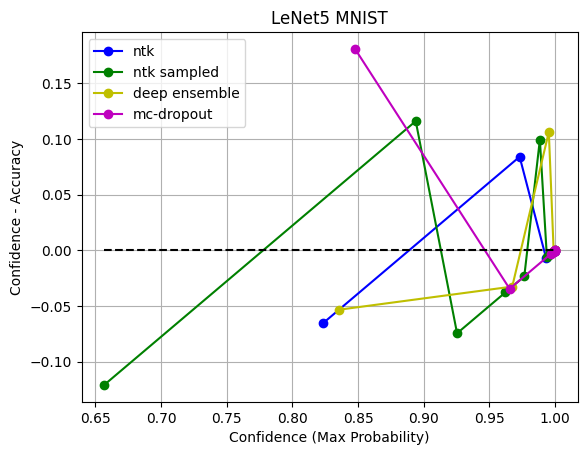

In [16]:
### Calibration curve
models = ['ntk','ntk sampled','deep ensemble','mc-dropout']
colours = ['b','g','y','m']
predictions = [y_pred_ntk,y_post_pred_ntk,ensemble_pred_avg,dropout_pred]
n_bins = 10

torch.set_printoptions(precision=4,sci_mode=False)
def calibration_curve_values(preds, target, n_bins, model='None'):
    '''
    INPUTS:
        - preds :: (n x c) torch.tensor
        - targets :: (n) torch.tensor

    OUTPUTS:
        - xs :: (n_bins) torch.tensor
            average confidence of prediction in each bin, given by softmax probability
        - ys :: (n_bins) torch.tensor
            average accuracy of predictions in each bin
    '''

    confidences, predictions = preds.softmax(dim=1).max(1)
    step = (confidences.shape[0] + n_bins -1) // n_bins
    bins = torch.sort(confidences)[0][::step]
    if confidences.shape[0] % step != 1:
        bins = torch.cat((bins, confidences.max().reshape(1)),dim=0)
    bin_lowers = bins[:-1]
    bin_uppers = bins[1:]
    accuracies = predictions == target
    xs = []
    ys = []
    for bin_lower_conf,bin_upper_conf in zip(bin_lowers,bin_uppers):
        in_bin = (confidences > bin_lower_conf) * (confidences < bin_upper_conf)
        prop_in_bin = in_bin.double().mean(dtype=torch.double)
        if prop_in_bin > 0:
            accuracy_in_bin = accuracies[in_bin].double().mean(dtype=torch.double)
            confidence_in_bin = confidences[in_bin].double().mean(dtype=torch.double)
            xs.append(confidence_in_bin)
            ys.append(accuracy_in_bin)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)

    return xs, ys

min_x = 1
fig1,ax1 = plt.subplots()
for i,m in enumerate(models):
    xs,ys = calibration_curve_values(predictions[i],test_y,n_bins,m)
    if xs.cpu().detach().numpy()[0] < min_x:
        min_x = xs.cpu().detach().numpy()[0]
    ax1.plot(xs.cpu().detach().numpy(),(xs - ys).cpu().detach().numpy(),
             '{}-o'.format(colours[i]),
             label=m)
ax1.plot(np.linspace(min_x,1,1000),np.zeros(1000),'--k')
ax1.set_xlabel('Confidence (Max Probability)')
ax1.set_ylabel('Confidence - Accuracy')
ax1.set_title('LeNet5 MNIST')
ax1.grid()
ax1.legend()
plt.show()

In [17]:
### Entropy Experiment - OOD Dataset - FashionMNIST

fmnist_dataset = datasets.FashionMNIST(
    root='data\FashionMNIST',
    train=False,
    download=True,
    transform=ToTensor()
)

ood_n = N_TEST
ood_test = torch.utils.data.Subset(
    fmnist_dataset,
    range(ood_n)
)

In [19]:
### Entropy Experiment - NTK
reload(df)

# Uncertainty for In-Distribution
rtol_solve = 1e-10
maxit_solve = 200

id_unc_ntk, _ = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=test_data,
    model=ntk_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve)

# Uncertainty for OOD
rtol_solve = 1e-10
maxit_solve = 200

ood_unc_ntk, _ = df.ntk_uncertainty_explicit_class(
    train_dataset=training_data,
    test_dataset=ood_test,
    model=ntk_net,
    num_classes=10,
    type='iterative',
    rtol=rtol_solve,
    maxit=maxit_solve)

100%|██████████| 1000/1000 [08:20<00:00,  2.00it/s]


In [28]:
print(np.max(ood_unc_ntk))

50.13156671540935


In [20]:
### Entropy Experiment - MC-Dropout

T = 30

## MNIST
id_dropout_pred, id_dropout_pred_var = dropout_sampler(test_x,T)

## FashionMNIST
FashionMNIST_loader = DataLoader(ood_test,len(ood_test))
FashionMNIST_set,_ = next(iter(FashionMNIST_loader))
ood_dropout_pred, ood_dropout_pred_var = dropout_sampler(FashionMNIST_set,T)

In [22]:
### Entropy Experiment - Deep Ensembles

## MNIST
id_ensemble_pred, id_ensemble_var = ensemble_sampler(test_x,ensemble_M)

## FashionMNIST
ood_ensemble_pred, ood_ensemble_pred_var = ensemble_sampler(FashionMNIST_set,ensemble_M)

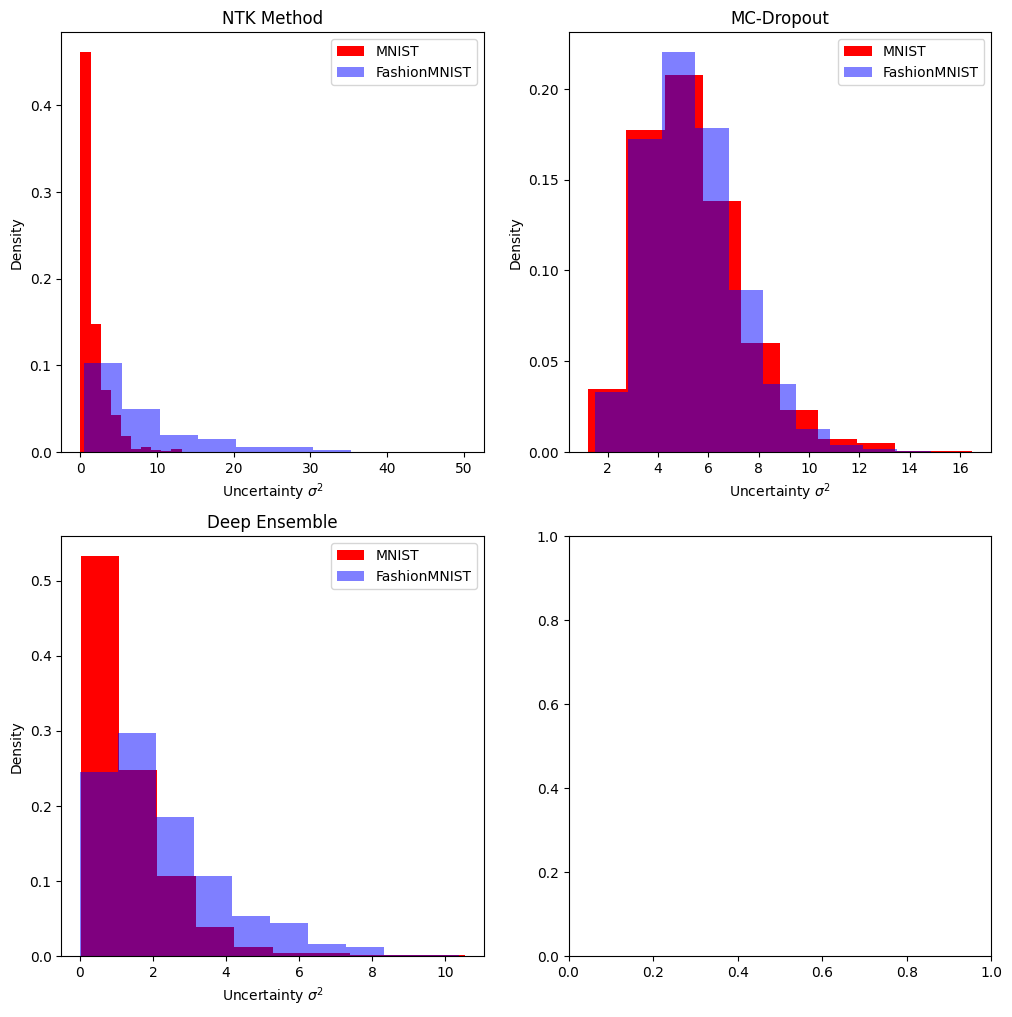

In [26]:
### Histogram of uncertainty values

fig2,((ax1,ax2),(ax3,_)) = plt.subplots(2,2)

fig2.set_figwidth(12)
fig2.set_figheight(12)

ax1.hist(id_unc_ntk.reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax1.hist(ood_unc_ntk.reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax1.set_xlabel("Uncertainty $\sigma^2$")
ax1.set_ylabel("Density")
ax1.set_title("NTK Method")
ax1.legend()
# ax1.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))

ax2.hist(id_dropout_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax2.hist(ood_dropout_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax2.set_xlabel("Uncertainty $\sigma^2$")
ax2.set_ylabel("Density")
ax2.set_title("MC-Dropout")
ax2.legend()
# ax2.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))

ax3.hist(id_ensemble_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=1,density=True,color='r',label='MNIST')
ax3.hist(ood_ensemble_pred_var.cpu().detach().numpy().reshape(-1,1),bins=10,stacked=True,alpha=0.5,density=True,color='b',label='FashionMNIST')
ax3.set_xlabel("Uncertainty $\sigma^2$")
ax3.set_ylabel("Density")
ax3.set_title("Deep Ensemble")
ax3.legend()
# ax3.set_xlim(-0.2,np.max(ood_unc_ntk.reshape(-1,1)))
plt.show()